## 例1 - 在 tensorboard 中记录 tensor 的变化。

In [1]:
import warnings
warnings.filterwarnings('ignore')  # 不打印 warning 

import tensorflow as tf

# 设置GPU按需增长
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

import os
import shutil

"""TensorBoard 简单例子。
tf.summary.scalar('var_name', var)        # 记录标量的变化
tf.summary.histogram('vec_name', vec)     # 记录向量或者矩阵，tensor的数值分布变化。

merged = tf.summary.merge_all()           # 把所有的记录并把他们写到 log_dir 中
train_writer = tf.summary.FileWriter(log_dir + '/add_example', sess.graph)  # 保存位置

运行完后，在命令行中输入 tensorboard --logdir='/Users/stephaniexia/Documents/AI tutorial/tensorflow tutorial/tensorboard_tutorial'(你保存到log路径)
"""

log_dir = '/Users/stephaniexia/Documents/AI tutorial/tensorflow tutorial/tensorboard_tutorial'
if os.path.exists(log_dir):   # 删掉以前的summary，以免重合
    shutil.rmtree(log_dir)
os.makedirs(log_dir)
print('created log_dir path')

with tf.name_scope('add_example'):
    a = tf.Variable(tf.truncated_normal([100,1], mean=0.5, stddev=0.5), name='var_a')
    tf.summary.histogram('a_hist', a)
    b = tf.Variable(tf.truncated_normal([100,1], mean=-0.5, stddev=1.0), name='var_b')
    tf.summary.histogram('b_hist', b)
    increase_b = tf.assign(b, b + 0.2)
    c = tf.add(a, b)
    tf.summary.histogram('c_hist', c)
    c_mean = tf.reduce_mean(c)
    tf.summary.scalar('c_mean', c_mean)
merged = tf.summary.merge_all()
writer = tf.summary.FileWriter(log_dir+'add_example', sess.graph)


sess.run(tf.global_variables_initializer())
for step in range(500):
    sess.run([merged, increase_b])    # 每步改变一次 b 的值
    summary = sess.run(merged)
    writer.add_summary(summary, step)
writer.close()

created log_dir path


## 例2： 分 train 和 test 两部分进行记录。
**Restart Kernel 然后继续**。每隔10个step记录一次test结果。一般在网络训练过程中，我们都会隔一段时间跑一次 valid。

In [1]:
import warnings
warnings.filterwarnings('ignore')  # 不打印 warning 

import tensorflow as tf

# 设置GPU按需增长
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

import numpy as np
import os
import shutil

"""TensorBoard 简单例子。
tf.summary.scalar('var_name', var)        # 记录标量的变化
tf.summary.histogram('vec_name', vec)     # 记录向量或者矩阵，tensor的数值分布变化。

merged = tf.summary.merge_all()           # 把所有的记录并把他们写到 log_dir 中
train_writer = tf.summary.FileWriter(log_dir + '/train', sess.graph)  # 保存位置
test_writer = tf.summary.FileWriter(log_dir + '/test', sess.graph)
运行完后，在命令行中输入 tensorboard --logdir=log_dir_path(你保存到log路径)
"""

log_dir = '../summary/graph2/'
if os.path.exists(log_dir):   # 删掉以前的summary，以免重合
    shutil.rmtree(log_dir)
os.makedirs(log_dir)
print('created log_dir path')

a = tf.placeholder(dtype=tf.float32, shape=[100,1], name='a')

with tf.name_scope('add_example'):
    b = tf.Variable(tf.truncated_normal([100,1], mean=-0.5, stddev=1.0), name='var_b')
    tf.summary.histogram('b_hist', b)
    increase_b = tf.assign(b, b + 0.2)
    c = tf.add(a, b)
    tf.summary.histogram('c_hist', c)
    c_mean = tf.reduce_mean(c)
    tf.summary.scalar('c_mean', c_mean)
merged = tf.summary.merge_all()
train_writer = tf.summary.FileWriter(log_dir + '/train', sess.graph)  # 保存位置
test_writer = tf.summary.FileWriter(log_dir + '/test', sess.graph)


sess.run(tf.global_variables_initializer())
for step in range(500):
    if (step+1) % 10 == 0:
        _a = np.random.randn(100,1) 
        summary, _ = sess.run([merged, increase_b], feed_dict={a: _a})    # 每步改变一次 b 的值
        test_writer.add_summary(summary, step)
    else:
        _a = np.random.randn(100,1) + step*0.2
        summary, _ = sess.run([merged, increase_b], feed_dict={a: _a})    # 每步改变一次 b 的值
        train_writer.add_summary(summary, step)
train_writer.close()
test_writer.close()
print('END!')

created log_dir path
END!


训练完后，在summary目录下输入 tensorboard --logdir graph2 就能看到结果了。如下图所示：

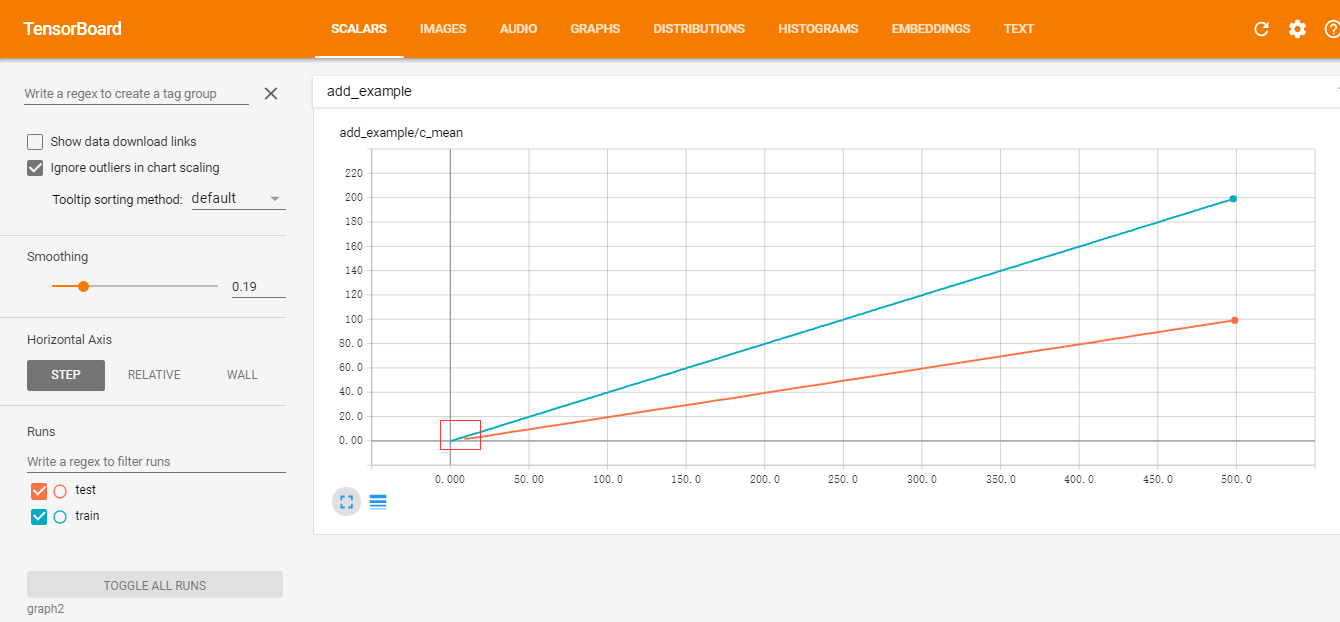

In [2]:
from IPython.display import Image
Image('../figs/graph2.png') 

### 关于 tensorboard 的一点心得

- 1.一定要学会使用 tf.variable_scope() 和 tf.name_scope(),否则稍微复杂一点的网络都会乱七八糟。你可以通过上图中的 graph 来看看自己构建的网络结构。
- 2.使用 tensorboard 来看 training 和 validation 的 loss 和 accuracy 变化对于调参非常非常有帮助。
- 3.tf.summary.scalar() 来记录某个标量的变化；使用 tf.summary.histogram() 来记录某个矩阵的数值分布。**特别要注意在统计值的分布的时候是要耗费大量的计算的，如果是一些没关紧要的参数就不要记录了，否则影响速度又浪费资源。**

想要了解更多，可以参考[详解 TensorBoard－如何调参](http://blog.csdn.net/aliceyangxi1987/article/details/71716596)